In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# 2. Load Data
print(" Loading Online Shoppers Data")
df = pd.read_csv('online_shoppers_intention.csv')
print(f"Data Shape: {df.shape}")
display(df.head())

 Loading Online Shoppers Data
Data Shape: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# feature selection
features = ['PageValues', 'ExitRates', 'ProductRelated_Duration', 'BounceRates']
X = df[features].copy()

# log transform for skewed columns
for col in ['PageValues', 'ProductRelated_Duration']:
    X[col] = np.log1p(X[col])

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Data ready. Shape: {X_pca.shape}")


Data ready. Shape: (12330, 2)


In [4]:
#dbscan
print("Running DBSCAN")

dbscan = DBSCAN(eps=0.8, min_samples=50)
labels_db = dbscan.fit_predict(X_pca)

score_db = silhouette_score(X_pca, labels_db)
print(f"Silhouette Score (DBSCAN): {score_db:.4f}")

print("Cluster counts:")
print(pd.Series(labels_db).value_counts())


Running DBSCAN
Silhouette Score (DBSCAN): 0.7583
Cluster counts:
1    11620
0      710
Name: count, dtype: int64


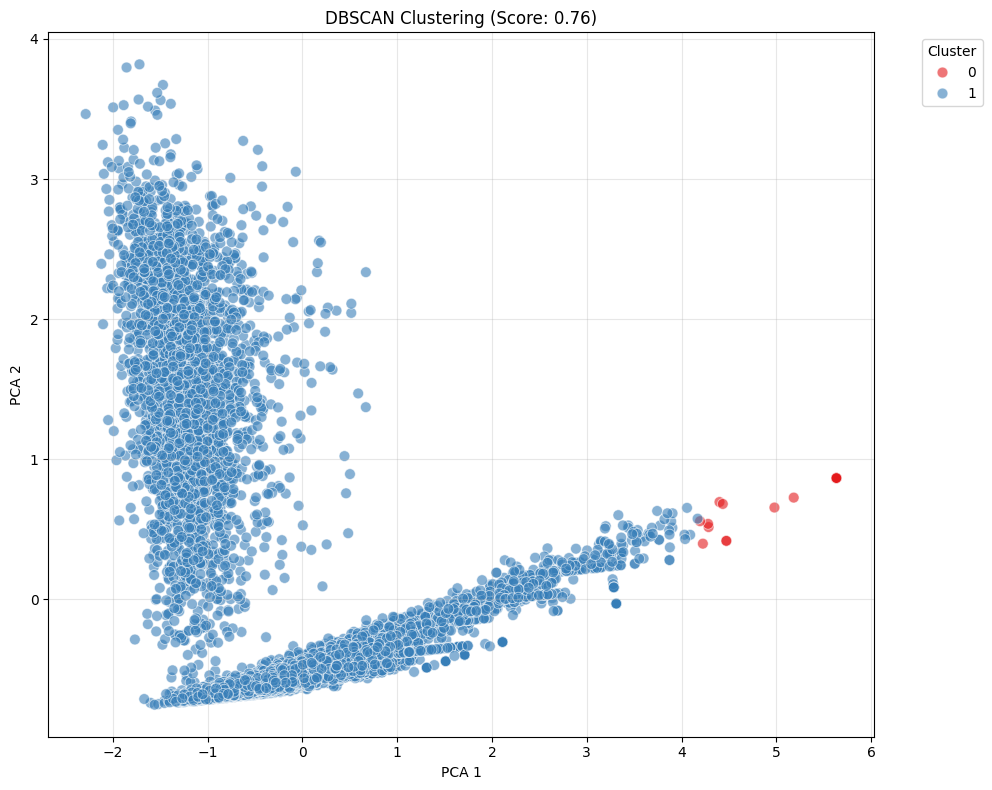

In [5]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_db,
    palette='Set1',
    s=60,
    alpha=0.6
)

plt.title(f'DBSCAN Clustering (Score: {score_db:.2f})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
